In [29]:
# Baseado no exemplo: https://www.kaggle.com/thebrownviking20/intro-to-recurrent-neural-networks-lstm-gru

In [30]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.preprocessing import MinMaxScaler
from keras.layers import SimpleRNN
from keras.models import Sequential
from numpy.random import seed
#from tensorflow import set_random_seed

In [31]:
seed(42)
#set_random_seed(42)

plt.rcParams['figure.figsize'] = 16,4

In [32]:
SPLIT_DATE = '2015/01/01'
WINDOW_SIZE = 30

# Importar Bases

In [33]:
import os.path
def path_base(base_name,folder):
    current_dir = os.path.abspath(os.path.join(os.getcwd()))
    print(current_dir)
    data_dir = current_dir.replace('notebook',folder)
    print(data_dir)
    data_base = data_dir + '\\' + base_name
    print(data_base)
    return data_base

In [34]:
df = pd.read_csv(path_base('db_IBM_stocks.csv','data'),index_col='Date')
df.head(5)

C:\MyGit\py_redesneurais\notebook
C:\MyGit\py_redesneurais\data
C:\MyGit\py_redesneurais\data\db_IBM_stocks.csv


,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [35]:
df['Average'] = (df['High'] + df['Low'])/2
df = df[['Average']]

df.head(5)

,Average
Date,
2006-01-03,81.680
2006-01-04,81.915
2006-01-05,81.950
2006-01-06,84.220
2006-01-09,83.815


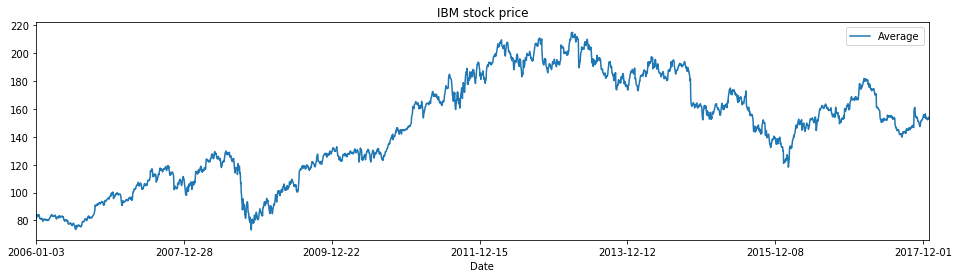

In [36]:
df.plot(legend=True)
plt.title('IBM stock price')
plt.show()

In [37]:
df_train = df[df.index < SPLIT_DATE].copy()
df_test = df[df.index >= SPLIT_DATE].copy()
SPLIT_DATE

'2015/01/01'

In [38]:
#scaler = MinMaxScaler()
#df_train['Average'] = scaler.fit_transform(df_train['Average'].values.reshape(-1, 1))
#df_test['Average'] = scaler.transform(df_test['Average'].values.reshape(-1, 1))

In [39]:
 def gen_rnn_inputs(df, window_size):
    X, y = [], []
    averages = df['Average'].values
    
    for i in range(window_size, len(df)):
        X.append(averages[i-window_size: i])
        y.append(averages[i])
        
    return np.array(X), np.array(y)

In [47]:
X_train, y_train = gen_rnn_inputs(df_train, WINDOW_SIZE)
X_test, y_test = gen_rnn_inputs(df_test, WINDOW_SIZE)

In [52]:
df_test

,Average
Date,
2016-01-04,135.105
2016-01-05,135.870
2016-01-06,134.600
2016-01-07,133.725
2016-01-08,132.570
...,...
2017-12-22,152.250
2017-12-26,153.180
2017-12-27,152.895


In [50]:
X_test

array([[135.105, 135.87 , 134.6  , ..., 118.28 , 119.7  , 122.215],
       [135.87 , 134.6  , 133.725, ..., 119.7  , 122.215, 124.91 ],
       [134.6  , 133.725, 132.57 , ..., 122.215, 124.91 , 131.875],
       ...,
       [148.46 , 148.23 , 147.455, ..., 152.475, 152.25 , 153.18 ],
       [148.23 , 147.455, 148.575, ..., 152.25 , 153.18 , 152.895],
       [147.455, 148.575, 149.49 , ..., 153.18 , 152.895, 153.66 ]])

In [51]:
y_test

array([124.91 , 131.875, 132.245, 133.36 , 132.71 , 131.585, 132.695,
       133.435, 132.13 , 133.335, 135.33 , 137.015, 138.22 , 138.69 ,
       138.885, 140.7  , 139.78 , 141.715, 142.115, 142.435, 143.495,
       145.885, 146.51 , 147.715, 148.56 , 146.58 , 146.355, 147.94 ,
       148.63 , 149.365, 151.23 , 151.605, 152.715, 150.625, 148.98 ,
       148.8  , 149.055, 150.585, 149.345, 150.43 , 151.57 , 151.53 ,
       152.315, 144.78 , 145.6  , 148.29 , 149.25 , 148.005, 148.845,
       149.875, 148.45 , 145.765, 145.715, 143.9  , 144.155, 146.375,
       146.22 , 147.605, 148.89 , 149.915, 148.25 , 148.64 , 148.715,
       148.395, 147.44 , 145.445, 146.53 , 147.305, 147.815, 150.295,
       151.78 , 152.54 , 153.04 , 152.405, 152.81 , 152.37 , 153.145,
       153.295, 153.565, 153.245, 152.595, 151.39 , 151.095, 151.195,
       150.15 , 151.66 , 153.595, 154.13 , 153.49 , 154.04 , 148.395,
       144.55 , 144.975, 147.465, 150.29 , 152.185, 151.38 , 151.165,
       152.79 , 153.

In [41]:
model = Sequential()
model.add(SimpleRNN(1, activation='relu', input_shape=(WINDOW_SIZE, 1)))
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.fit(np.expand_dims(X_train, axis=-1), y_train, epochs=100, batch_size=8, verbose=2)

Epoch 1/100
 - 2s - loss: 1223918.7513
Epoch 2/100
 - 1s - loss: 179896.4029
Epoch 3/100
 - 1s - loss: 75282.5315
Epoch 4/100
 - 1s - loss: 36988.3565
Epoch 5/100
 - 1s - loss: 19022.8609
Epoch 6/100
 - 1s - loss: 9753.3231
Epoch 7/100
 - 1s - loss: 4835.0792
Epoch 8/100
 - 1s - loss: 2263.2205
Epoch 9/100
 - 1s - loss: 980.3449
Epoch 10/100
 - 1s - loss: 385.6020
Epoch 11/100
 - 1s - loss: 136.8308
Epoch 12/100
 - 1s - loss: 45.9258
Epoch 13/100
 - 1s - loss: 17.9444
Epoch 14/100
 - 1s - loss: 10.9293
Epoch 15/100
 - 1s - loss: 9.5577
Epoch 16/100
 - 1s - loss: 9.3597
Epoch 17/100
 - 1s - loss: 9.3475
Epoch 18/100
 - 1s - loss: 9.3450
Epoch 19/100
 - 1s - loss: 9.3458
Epoch 20/100
 - 1s - loss: 9.3482
Epoch 21/100
 - 1s - loss: 9.3509
Epoch 22/100
 - 1s - loss: 9.3461
Epoch 23/100
 - 1s - loss: 9.3403
Epoch 24/100
 - 1s - loss: 9.3427
Epoch 25/100
 - 1s - loss: 9.3463
Epoch 26/100
 - 1s - loss: 9.3381
Epoch 27/100
 - 1s - loss: 9.3436
Epoch 28/100
 - 1s - loss: 9.3298
Epoch 29/100
 - 

In [46]:
y_pred = model.predict(np.expand_dims(X_test, axis=-1))
np.expand_dims(X_test, axis=-1)

array([[[135.105],
        [135.87 ],
        [134.6  ],
        ...,
        [118.28 ],
        [119.7  ],
        [122.215]],

       [[135.87 ],
        [134.6  ],
        [133.725],
        ...,
        [119.7  ],
        [122.215],
        [124.91 ]],

       [[134.6  ],
        [133.725],
        [132.57 ],
        ...,
        [122.215],
        [124.91 ],
        [131.875]],

       ...,

       [[148.46 ],
        [148.23 ],
        [147.455],
        ...,
        [152.475],
        [152.25 ],
        [153.18 ]],

       [[148.23 ],
        [147.455],
        [148.575],
        ...,
        [152.25 ],
        [153.18 ],
        [152.895]],

       [[147.455],
        [148.575],
        [149.49 ],
        ...,
        [153.18 ],
        [152.895],
        [153.66 ]]])

In [44]:
df_test_preds = df_test.copy()
df_test_preds['Average'] = np.zeros(WINDOW_SIZE).tolist() + y_test.reshape(-1,1).squeeze().tolist()
df_test_preds['Pred'] = np.zeros(WINDOW_SIZE).tolist() + y_pred.reshape(-1,1).squeeze().tolist()

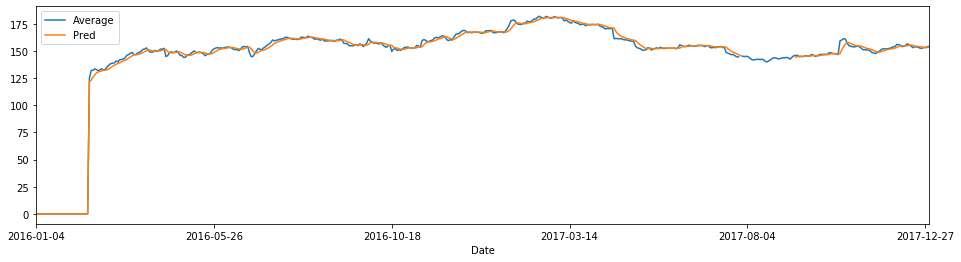

In [45]:
df_test_preds.plot(legend=True)